This is a sample pytorch model for testing the compiler you can create your own model as per your requirements 😉

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [2]:
class Model(nn.Module):
    def __init__(self, n_input=4, n_output=3):
        super(Model, self).__init__()
        self.layers = nn.ModuleList([
            nn.Linear(n_input, 32),
            nn.ReLU(),
            nn.Linear(32, n_output),
            nn.Softmax(dim=1)
        ])

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def train_model(self, x_train, y_train, epochs=1000, learning_rate=1e-3):
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        loss_function = nn.CrossEntropyLoss()
        for epoch in range(epochs):
            optimizer.zero_grad()
            y_logits = self.forward(x_train)
            loss = loss_function(y_logits, y_train)
            loss.backward()
            optimizer.step()
            if epoch % 10 == 0:
                print(f'Epoch: {epoch}, Loss: {loss.item()}')

model = Model(n_input=X_train.shape[1], n_output=len(np.unique(y_train)))
model.train_model(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())


Epoch: 0, Loss: 1.0702037811279297
Epoch: 10, Loss: 1.0355452299118042
Epoch: 20, Loss: 1.0012778043746948
Epoch: 30, Loss: 0.9690320491790771
Epoch: 40, Loss: 0.939879298210144
Epoch: 50, Loss: 0.9139660000801086
Epoch: 60, Loss: 0.8912060260772705
Epoch: 70, Loss: 0.8712958693504333
Epoch: 80, Loss: 0.8538026809692383
Epoch: 90, Loss: 0.838292121887207
Epoch: 100, Loss: 0.8242505788803101
Epoch: 110, Loss: 0.8111990690231323
Epoch: 120, Loss: 0.7987539172172546
Epoch: 130, Loss: 0.7867432236671448
Epoch: 140, Loss: 0.7750563025474548
Epoch: 150, Loss: 0.7638381123542786
Epoch: 160, Loss: 0.7532250285148621
Epoch: 170, Loss: 0.7434446215629578
Epoch: 180, Loss: 0.7345972657203674
Epoch: 190, Loss: 0.726582944393158
Epoch: 200, Loss: 0.7191382050514221
Epoch: 210, Loss: 0.712234377861023
Epoch: 220, Loss: 0.7059173583984375
Epoch: 230, Loss: 0.6999247074127197
Epoch: 240, Loss: 0.6941068172454834
Epoch: 250, Loss: 0.6884809732437134
Epoch: 260, Loss: 0.6831198334693909
Epoch: 270, Loss

<Figure size 800x600 with 0 Axes>

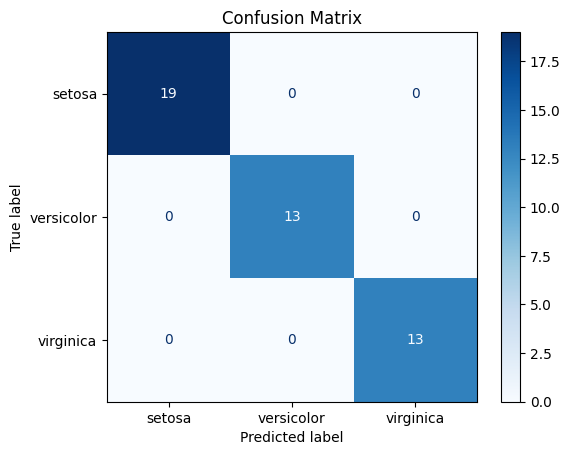

In [3]:
with torch.no_grad():
    y_logits = model.forward(torch.from_numpy(X_test).float())
    _, predicted = torch.max(y_logits, 1)

cm = confusion_matrix(y_test, predicted.numpy())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [4]:
#Saving the Model
torch.save(model, 'model.pth')
